In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn import metrics

%matplotlib inline

In [178]:
df_train = pd.read_csv('train.csv')

In [179]:
df_test = pd.read_csv('test.csv')

### PRE-PROCESS OF DATA WRANGLING ==> DEFINIG DATA AND TEST SETS

In [180]:
## Concatenate the train and test data set to handle with the missing values together
data = pd.concat([df_train.drop('SalePrice', axis=1), df_test])

## Unnecessary Id Column is dropped 
data.drop(['Id'], axis=1, inplace=True)

## Save Train and Test Id columns for future use
train_ID = df_train['Id']
test_ID = df_test['Id']

## Droping unnecessary Id Columns 
df_train.drop('Id', axis=1, inplace=True)
df_test.drop('Id', axis=1, inplace=True)

### HANDLING WITH MISSING VALUES

In [181]:
## Revealing the total missing values numbers both in train and test data sets
data.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageCond        159
GarageQual        159
GarageYrBlt       159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
BsmtFinSF2          1
BsmtFinSF1          1
Exterior2nd         1
BsmtUnfSF           1
TotalBsmtSF         1
Exterior1st         1
SaleType            1
                 ... 
YearRemodAdd        0
YearBuilt           0
SaleCondition       0
HeatingQC           0
ExterQual           0
ExterCond           0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF

In [182]:
## Deleting columns if more than 30% missing value exists

count_of_not_null = df_train.count() ## count_of_not_null shows the number of non-missing values in each colums
null_more_than_30_percent = [n for n in count_of_not_null if n < 0.3 * df_train.shape[0]]
remove_those_columns = []

for item in null_more_than_30_percent:
    column_removed =   count_of_not_null[count_of_not_null == item].index[0]
    print ('column_removed :', column_removed)
    remove_those_columns.append(column_removed)

column_removed : Alley
column_removed : PoolQC
column_removed : Fence
column_removed : MiscFeature


In [183]:
## Alley, PoolQC, Fence and MiscFeature Columns have more than 30% missing value so those columns are removed from\
## both train and test data set files seperatle and from combined data set, as well

df_train = df_train.drop(remove_those_columns, 1)
df_test = df_test.drop(remove_those_columns, 1)
data = data.drop(remove_those_columns, 1)

In [184]:
## Defining and sorting missing values for only TRAIN set

df_train_NAs = df_train.isnull().sum()
df_train_NAs = df_train_NAs[df_train_NAs>0]
df_train_NAs.sort_values(ascending = False)


FireplaceQu     690
LotFrontage     259
GarageCond       81
GarageQual       81
GarageFinish     81
GarageYrBlt      81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
dtype: int64

In [185]:
## Defining and sorting missing values for only TEST set

df_test_NAs = df_test.isnull().sum()
df_test_NAs = df_test_NAs[df_test_NAs>0]
df_test_NAs.sort_values(ascending = False)


FireplaceQu     730
LotFrontage     227
GarageCond       78
GarageQual       78
GarageFinish     78
GarageYrBlt      78
GarageType       76
BsmtCond         45
BsmtExposure     44
BsmtQual         44
BsmtFinType1     42
BsmtFinType2     42
MasVnrType       16
MasVnrArea       15
MSZoning          4
BsmtFullBath      2
BsmtHalfBath      2
Functional        2
Utilities         2
Exterior2nd       1
Exterior1st       1
SaleType          1
BsmtFinSF1        1
BsmtFinSF2        1
TotalBsmtSF       1
KitchenQual       1
GarageCars        1
GarageArea        1
BsmtUnfSF         1
dtype: int64

In [186]:
## Categorical Features
categorical_features = df_train.select_dtypes(include = ['object']).columns
categorical_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [187]:
## Numerical Features
numerical_features = df_train.select_dtypes(exclude = ['object']).columns
numerical_features_for_test_set = numerical_features.drop('SalePrice')
numerical_features


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [188]:
df_train_num = df_train[numerical_features]
df_test_num = df_test[numerical_features_for_test_set]
df_train_cat = df_train[categorical_features]
df_test_cat = df_test[categorical_features]

In [189]:
df_train.head(4)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000


In [190]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [191]:
print ('Train data shape : {}'.format(df_train.shape))
print ('Test data shape : {}'.format(df_test.shape))

Train data shape : (1460, 76)
Test data shape : (1459, 75)


In [192]:
## Handling missing values of NUMERICAL categories by MEDIAN method
print ('NAs for numerical features in df_train: '+str(df_train_num.isnull().values.sum()))
print ('NAs for numerical features in df_test: '+str(df_test_num.isnull().values.sum()))

df_train_num = df_train_num.fillna(df_train_num.median())
df_test_num = df_test_num.fillna(df_test_num.median())

print ('After filling NAs: Missing NAs for numerical features in df_train: '+str(df_train_num.isnull().values.sum()))
print ('After filling NAs: Missing NAs for numerical features in df_test: '+str(df_test_num.isnull().values.sum()))

NAs for numerical features in df_train: 348
NAs for numerical features in df_test: 330
After filling NAs: Missing NAs for numerical features in df_train: 0
After filling NAs: Missing NAs for numerical features in df_test: 0


In [193]:
## Handling missing values of CATEGORICAL features by MOST FREQUENT values

print ('NAs for categorical features in df_train: '+str(df_train_cat.isnull().values.sum()))
print ('NAs for categorical features in df_test: '+str(df_test_cat.isnull().values.sum()))

df_train_cat = df_train_cat.fillna(df_train_cat.count(0))
df_test_cat = df_test_cat.fillna(df_test_cat.count(0))
        
df_train = pd.concat([df_train_cat, df_train_num], axis=1)
df_test = pd.concat([df_test_cat, df_test_num], axis=1)

      
print ('After filling NAs: Missing NAs for categorical features in df_train: '+str(df_train_cat.isnull().values.sum()))
print ('After filling NAs: Missing NAs for categorical features in df_test: '+str(df_test_cat.isnull().values.sum()))

NAs for categorical features in df_train: 1210
NAs for categorical features in df_test: 1285
After filling NAs: Missing NAs for categorical features in df_train: 0
After filling NAs: Missing NAs for categorical features in df_test: 0


In [194]:
## Analyzing/Descriptive Statistics of SALEPRICE

df_train.SalePrice.describe()

## Most of the house price are roughly between $130,000-$214,000

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

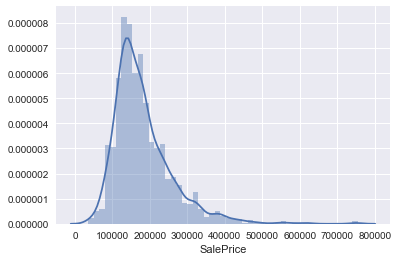

In [195]:
## As shown in the graphic the sale has a normal ditribution
import seaborn as sns
sns.distplot(df_train.SalePrice)

In [196]:
## SKEWNESS of SalePrice
df_train_num['SalePrice'].skew()

## It has a positive skewness

1.8828757597682129

In [197]:
## KURTOSIS of SalePrice

df_train['SalePrice'].kurt()

## It has a high kurtosis

6.5362818600645287

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e3cdf98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1e445080>]], dtype=object)

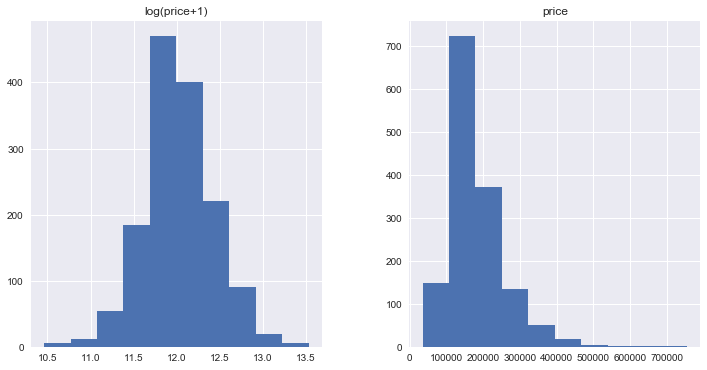

In [198]:
plt.rcParams['figure.figsize'] = (12, 6)
prices = pd.DataFrame({'price':df_train['SalePrice'], 'log(price+1)':np.log1p(df_train['SalePrice'])})

prices.hist()

## log transform SalePrice looks more approprite to normal distribution and almost got rid of skewness 

In [199]:
## LOG TRANSFORMS of numeric values

#df_train.SalePrice = np.log1p(df_train.SalePrice)

#numeric_feats = df_train_num.index


#skewed_feats = df_train_num[numeric_feats].apply(lambda x: skew(x.dropna()))
#skewed_feats = skewed_feats[skewed_feats > 0.75]
#skewed_feats = skewed_feats.index

#df_train[skewed_feats] = np.log1p(df_train_num[skewed_feats])



In [200]:
## CORRELATION MATRIX of SALEPRICE with other numeric features

df_train_corr = df_train_num.iloc[:,:].corr() 
df_train_corr.sort_values(['SalePrice'], ascending = False, inplace = True)
print (df_train_corr.SalePrice)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


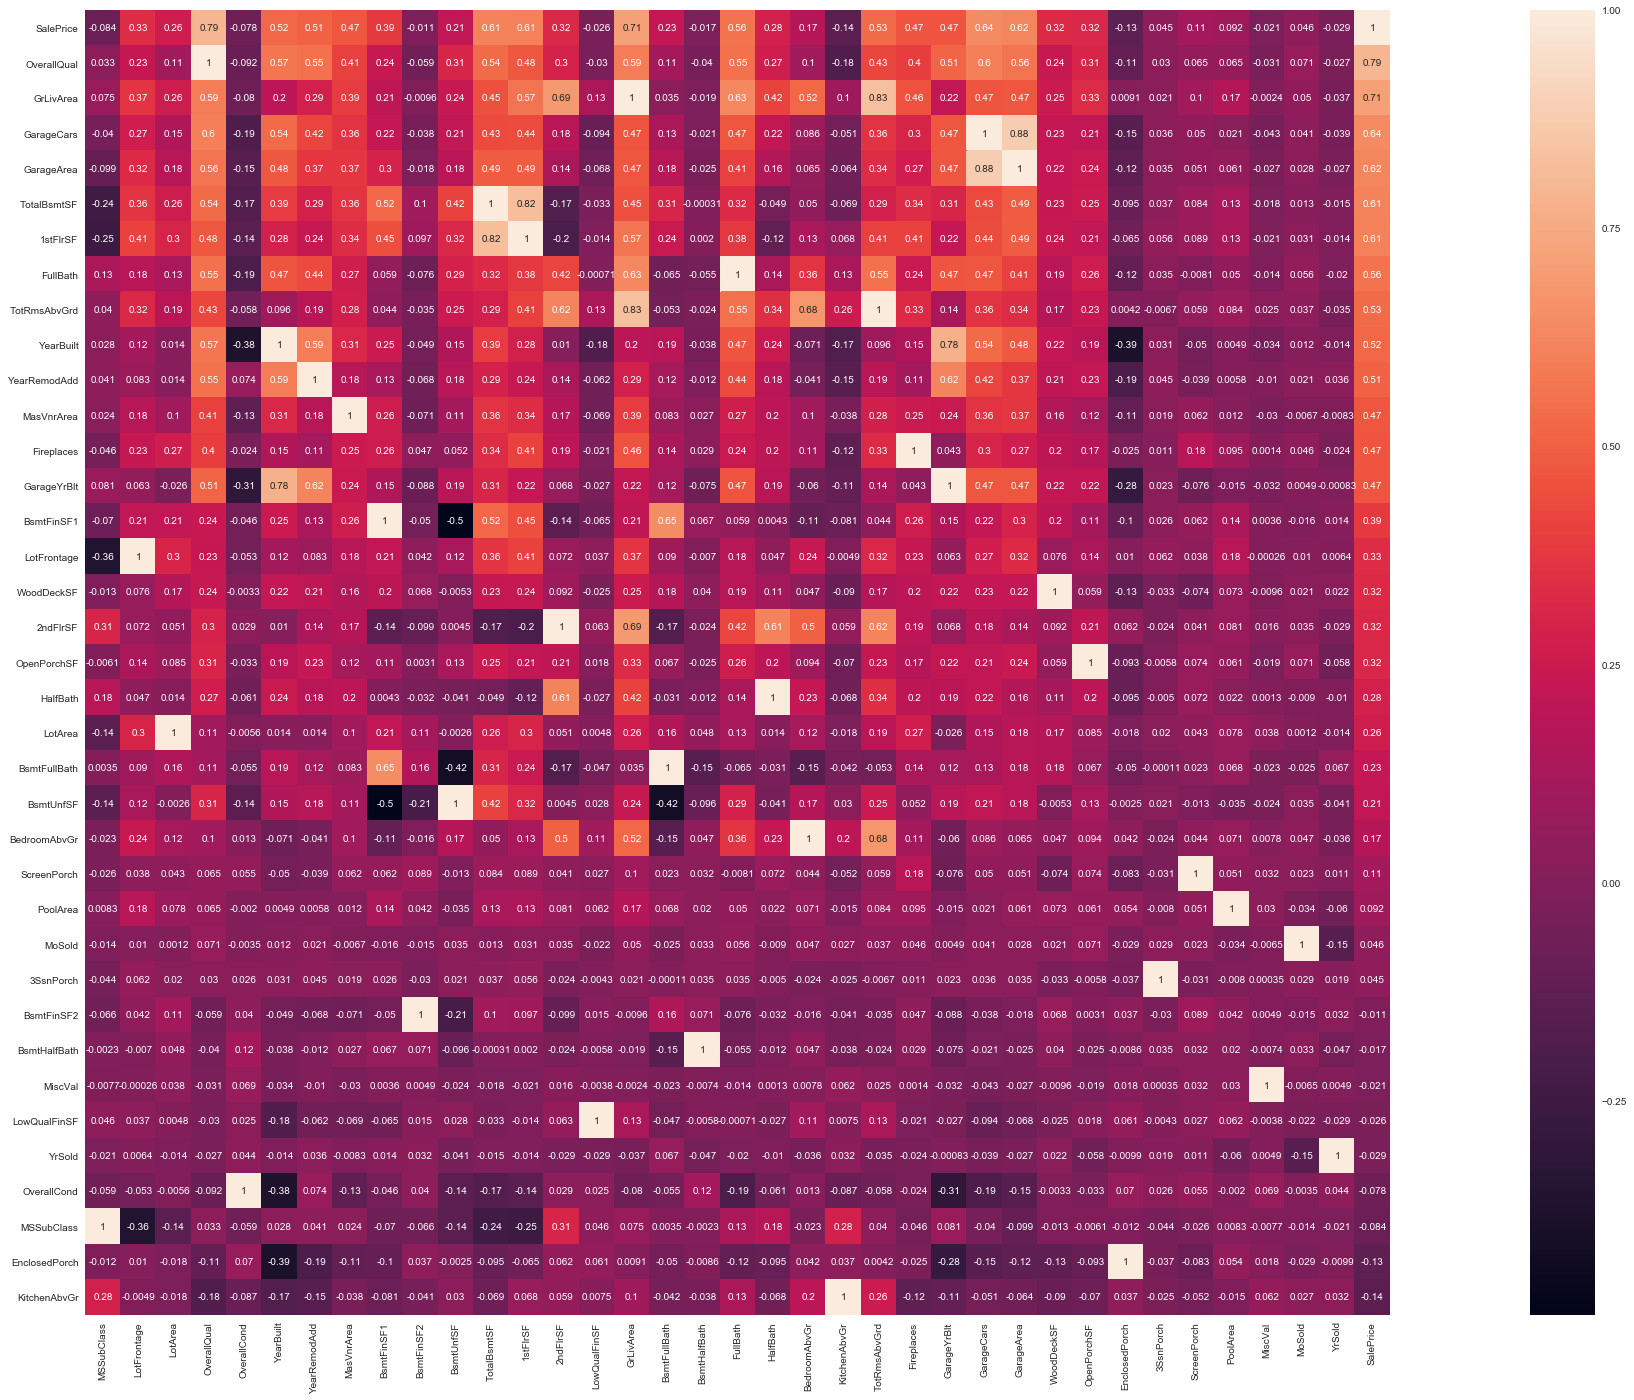

In [201]:
## The heatmap of the CORRELATION MATRIX

plt.figure(figsize = (50,24))
sns.heatmap(df_train_corr, vmax=1, square =True, annot=True)

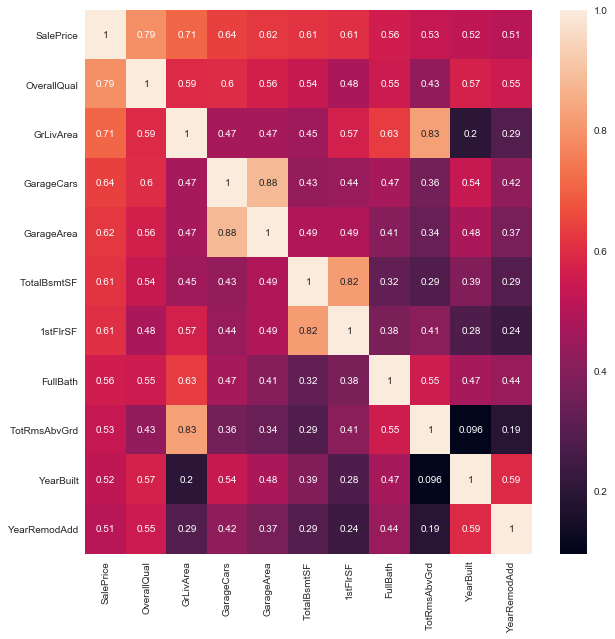

In [202]:
## MOST CORRELATED FEATURES

top_correlated_features = df_train_corr.index[abs(df_train_corr['SalePrice'])>0.5]
plt.figure(figsize=(10,10))
zoomed_heatmap = sns.heatmap(df_train_num[top_correlated_features].corr(), annot = True)
plt.show()

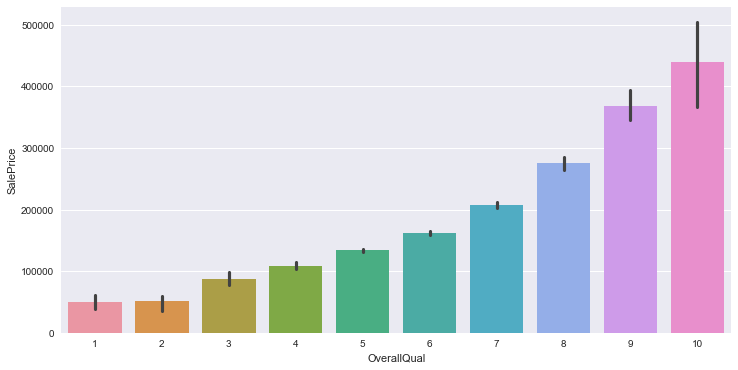

In [203]:
sns.barplot(df_train.OverallQual, df_train.SalePrice)

In [204]:
## threshold is defined 0.5 to selct only highly correlated predictors

## There is a MISTAKE in this part the values are corect but column names

threshold = 0.5 

correlation_list = []
size =36 # predictors' size (only numerics predictors are considered)

for i in range(0, size):
    for j in range (i+1, size): # we don't want to compare the same predictors with each other
        if (df_train_corr.iloc[i,j] >= threshold and df_train_corr.iloc[i,j] < 1):
            correlation_list.append([df_train_corr.iloc[i,j], i, j]) # we store the correlation and its index values
            
#sorted_correlation_list = sorted(correlation_list, key=lambda x: -abs(x[0]))
sorted_correlation_list = sorted(correlation_list, reverse=True)

for v, i, j in sorted_correlation_list:
    print ('%s and %s : %.2f' % (df_train_num.columns[i], df_train_num.columns[j], v))

OverallCond and GarageCars : 0.88
OverallQual and GarageArea : 0.88
BsmtFinSF1 and GrLivArea : 0.83
LotArea and TotRmsAbvGrd : 0.83
YearRemodAdd and TotalBsmtSF : 0.82
YearBuilt and 1stFlrSF : 0.82
MSSubClass and OverallQual : 0.79
BsmtFinSF2 and GarageYrBlt : 0.78
MSSubClass and GrLivArea : 0.71
LotArea and 2ndFlrSF : 0.69
BsmtFinSF1 and BedroomAbvGr : 0.68
LowQualFinSF and BsmtFullBath : 0.65
MSSubClass and GarageCars : 0.64
MasVnrArea and GrLivArea : 0.63
LotArea and FullBath : 0.63
MSSubClass and GarageArea : 0.62
BsmtUnfSF and GarageYrBlt : 0.62
BsmtHalfBath and TotRmsAbvGrd : 0.62
BsmtFinSF1 and 2ndFlrSF : 0.62
MSSubClass and TotalBsmtSF : 0.61
BsmtHalfBath and HalfBath : 0.61
MSSubClass and 1stFlrSF : 0.61
LotFrontage and GarageCars : 0.60
LotArea and OverallQual : 0.59
LotFrontage and GrLivArea : 0.59
LotFrontage and YearBuilt : 0.57
YearRemodAdd and GrLivArea : 0.57
LotArea and 1stFlrSF : 0.57
LotFrontage and GarageArea : 0.56
MSSubClass and FullBath : 0.56
BsmtFinSF1 and Full

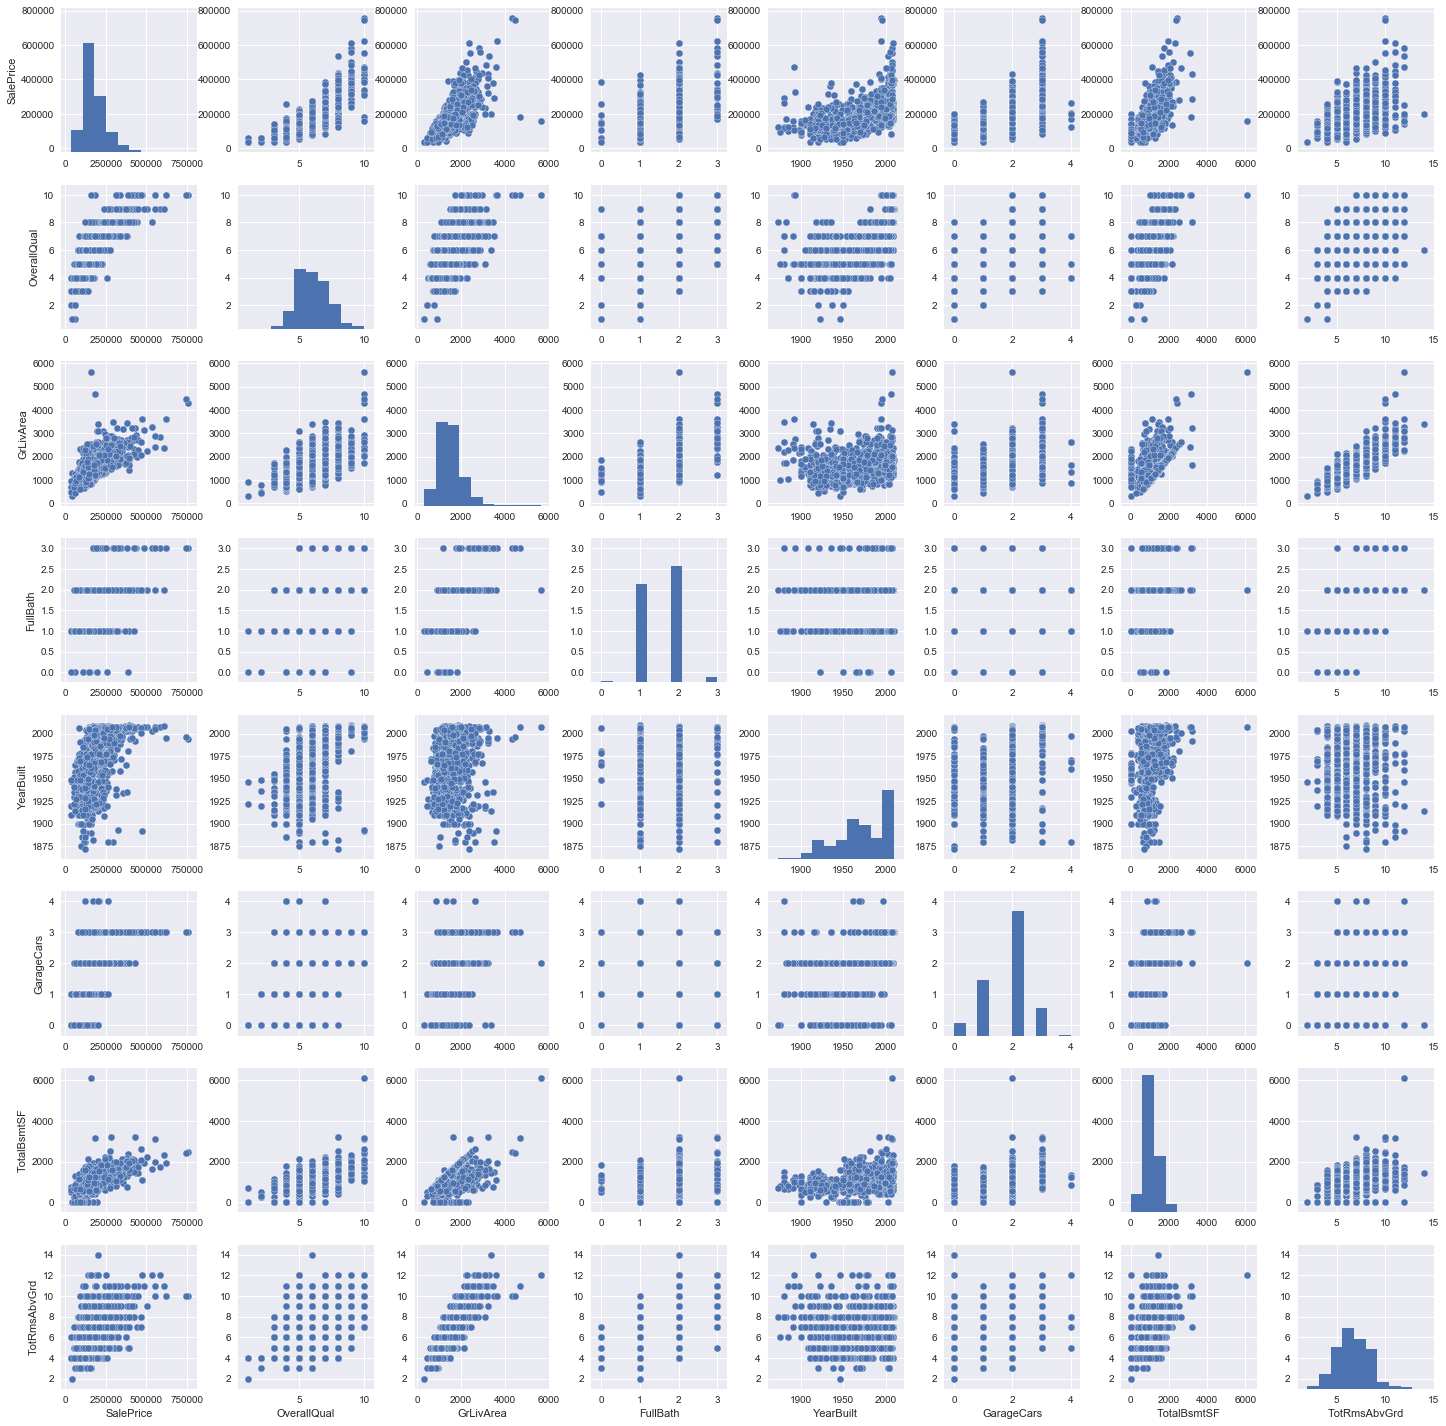

In [205]:
## Scatter Plot of Predictors

predictors = [ 'OverallQual','GrLivArea', 'FullBath', 'YearBuilt', 'GarageCars','TotalBsmtSF', 'TotRmsAbvGrd']
 
sns.set()
for_pairplot = predictors
for_pairplot.insert(0,'SalePrice')
sns.pairplot(df_train_num[for_pairplot], size=2.5)
sns.color_palette('bright')
plt.show()

In [206]:
## As seen above the heatmap:

## Overallqual, GrLivArea, TotalBsmtSF have strong correlation with SALEPRICE

## GarageCars and GarageArea are on the similar spot and have a strong correlation with each other, 
   ## I will keep only GarageCars as a predictor
 
## YearBuilt and GarageYrBlt have also strong positive correlation so I will keep only YearBuilt as a predictor

## TotalBsmt and 1stFloor also have strong correlation with each other so TotalBsmt will be kept

## FullBath and TotRmsAbvGrd are the other my model's predictors


In [207]:
df_train_cat = pd.get_dummies(df_train_cat)
df_test_cat = pd.get_dummies(df_test_cat)

## LINEAR REGRESSION MODEL

In [208]:
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

## Defining Linear Regression Model
reg=linear_model.LinearRegression()

#### IF ALL NUMERIC FEATURES ARE INVOLVED IN OUR MODAL

In [209]:
df_train = pd.concat([df_train_num, df_train_cat], axis=1)
df_test = pd.concat([df_test_num, df_test_cat], axis=1)


#X_train = df_train_num.iloc[:,:-1] 
#y_train = df_train_num.SalePrice



In [210]:
X_test = df_test_num
X_train, X_valid, y_train, y_valid = train_test_split(df_train_num.iloc[:,:-1], 
                                                      df_train_num.SalePrice, test_size=0.25)

In [211]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [212]:
y_pred = reg.predict(X_valid)

In [213]:
#print (y_pred)

In [214]:
coeff = pd.DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = pd.Series(reg.coef_)
coeff

,0,Coefficient Estimate
0,MSSubClass,-218.187981
1,LotFrontage,-135.343907
2,LotArea,0.432505
3,OverallQual,18479.778809
4,OverallCond,3444.541789
5,YearBuilt,250.251708
6,YearRemodAdd,151.670595
7,MasVnrArea,26.600704
8,BsmtFinSF1,7.706501
9,BsmtFinSF2,0.368892


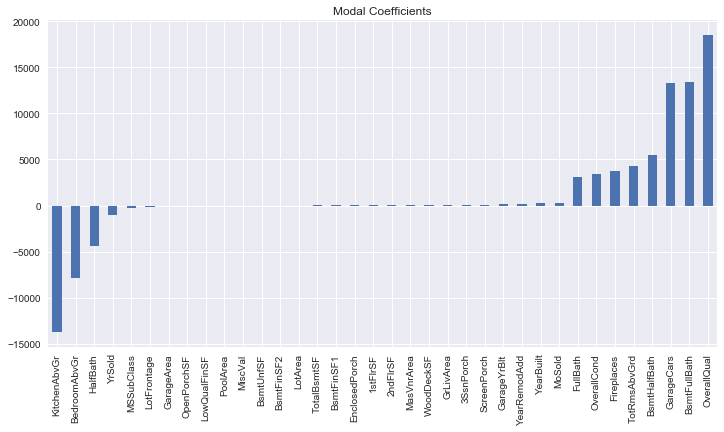

In [215]:
## checking the magnitude of coefficients

#predictors = x_train.columns

coef = pd.Series(reg.coef_, X_train.columns).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [216]:
reg.intercept_

1083207.1633320414

In [217]:
reg.score(X_valid, y_valid)

0.83456771274151931

In [218]:
reg.score(X_train, y_train)

0.80226556571129726

In [219]:
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

32218.94972785734

Text(0.5,1,'Residual plot')

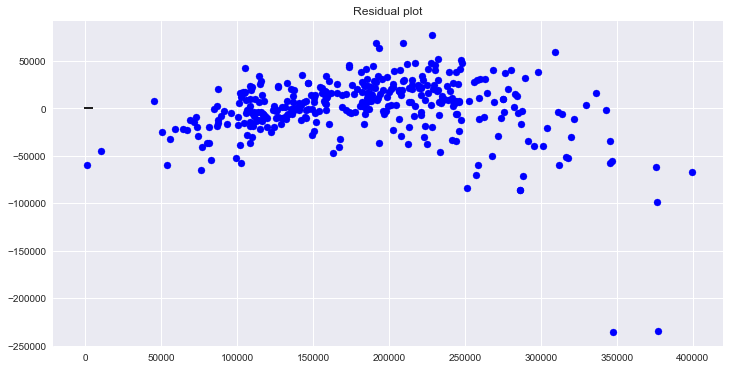

In [220]:
x_plot = plt.scatter(y_pred, (y_pred - y_valid), c='b')
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')


### SELECTING SOME FEATURES FOR OUR MODEL

In [312]:
## Defining predictors for our model 
predictors = [ 'OverallQual','GrLivArea', 'FullBath', 'YearBuilt', 'GarageCars','TotalBsmtSF', 'TotRmsAbvGrd']
 

In [313]:
## Spliting Test Set and Data Set

df_train = pd.concat([df_train_num, df_train_cat], axis=1)
df_test = pd.concat([df_test_num, df_test_cat], axis=1)

X_train = df_train[predictors]
y_train = df_train.SalePrice
X_test = df_test[predictors]

In [314]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [315]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [316]:
reg.coef_

array([ 20506.29653343,     54.5898003 ,  -5437.31130847,    335.73370715,
        14661.33105184,     29.1221799 ,   -201.53127305])

In [317]:
print (y_pred)

[ 248947.81257882  195734.68106716  212053.41240128  195016.44395198
   81985.08260143  343477.20764012  140464.34195474   98128.31628981
  159476.9068981   191178.92676705  107045.53037557  165723.43563968
  164670.13905359  160806.75227871  211668.30765754   99121.19121019
  122162.83543113  153007.85570018  105213.21967229  331043.65241841
  192767.5508149   276757.37244888   35891.3195999   179949.82093412
  330099.14690085  272324.75980558   63966.61364394  223920.29949085
  208912.14213131  134535.49593817  279176.40571865   92721.45538071
  144068.71427641   48980.19082353  145486.66016677  119830.30494608
  237560.31931306  130643.76791667  160466.62400266   83630.30985925
  257723.70137574  190694.15254519  160460.85528317  112622.16857149
  119957.27256007  135750.57445578  115066.12750425  165352.39860761
  168559.57870606  195278.68805357  118717.64614051  180638.84688945
  239767.04312217  154051.42372392  104752.49673975  312294.81455566
  168579.9348466   104782.83391011

In [318]:
reg.intercept_

-735582.80071404064

In [319]:
reg.score(X_train, y_train)

0.76865242795276756

In [421]:
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

48680.433477302002

## L1 LASSO LRM with all numeric features

In [457]:
X_test = df_test_num
X_train, X_valid, y_train, y_valid = train_test_split(df_train_num.iloc[:,:-1], 
                                                      df_train_num.SalePrice, test_size=0.25)

In [458]:
## L1 LASSO REGRESSION LINEAR MODEL

ls = linear_model.Lasso(alpha=10, max_iter=500000)
ls.fit(X_train, y_train)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=500000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [459]:
y_pred = ls.predict(X_valid)

In [460]:
print(ls.intercept_)

858173.944843


In [461]:
#print (y_pred)

In [462]:
coeff = pd.DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = pd.Series(ls.coef_)
coeff

,0,Coefficient Estimate
0,MSSubClass,-194.248560
1,LotFrontage,-111.018717
2,LotArea,0.337745
3,OverallQual,17489.180437
4,OverallCond,2988.315637
5,YearBuilt,252.177801
6,YearRemodAdd,181.550073
7,MasVnrArea,28.528983
8,BsmtFinSF1,10.964146
9,BsmtFinSF2,-0.518646


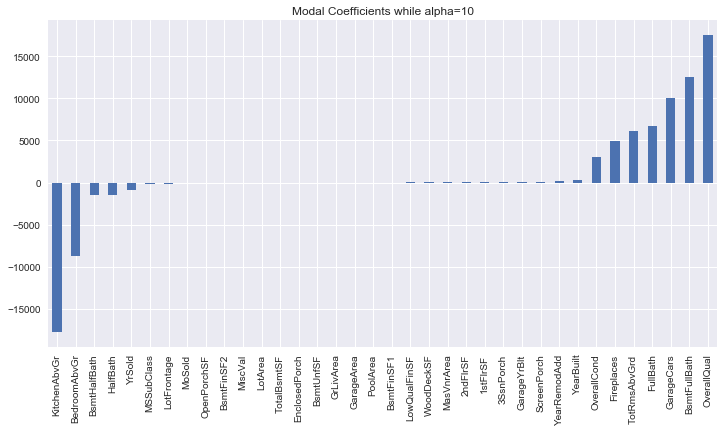

In [463]:

#predictors = x_train.columns

coef = pd.Series(ls.coef_, X_train.columns).sort_values()
coef.plot(kind='bar', title='Modal Coefficients while alpha=10')

In [464]:
ls.score(X_train, y_train)

0.80553532904489955

In [465]:
ls.score(X_valid, y_valid)

0.82302379999147834

In [466]:
y_pred= ls.predict(X_valid)
rsme = np.sqrt(metrics.mean_squared_error(y_pred, y_valid)) 
rsme

34276.391070660982

## MODEL L2 RIDGE

In [505]:
## Defining test and data sets

X_test = df_test_num
X_train, X_valid, y_train, y_valid = train_test_split(df_train_num.iloc[:,:-1], 
                                                      df_train_num.SalePrice, test_size=0.25)

In [506]:
model_ridge = Ridge()

In [507]:
rdgCV = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100, 1000], cv=5)
rdgCV.fit(X_train, y_train)

RidgeCV(alphas=[0.01, 0.1, 1, 10, 100, 1000], cv=5, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [508]:
print (rdgCV.alpha_)

100


In [509]:
rdg = Ridge(alpha=0.01)
rdg.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [510]:
## R-Square
rdg.score(X_valid, y_valid)

0.82529549915986178

In [511]:
rdg.score(X_train, y_train)

0.79869953167363172

In [512]:
coeff = pd.DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = pd.Series(rdg.coef_)
coeff

,0,Coefficient Estimate
0,MSSubClass,-191.605638
1,LotFrontage,-55.398114
2,LotArea,0.340946
3,OverallQual,17364.321870
4,OverallCond,4469.280281
5,YearBuilt,265.632875
6,YearRemodAdd,193.405201
7,MasVnrArea,22.921853
8,BsmtFinSF1,6.408975
9,BsmtFinSF2,-0.229303


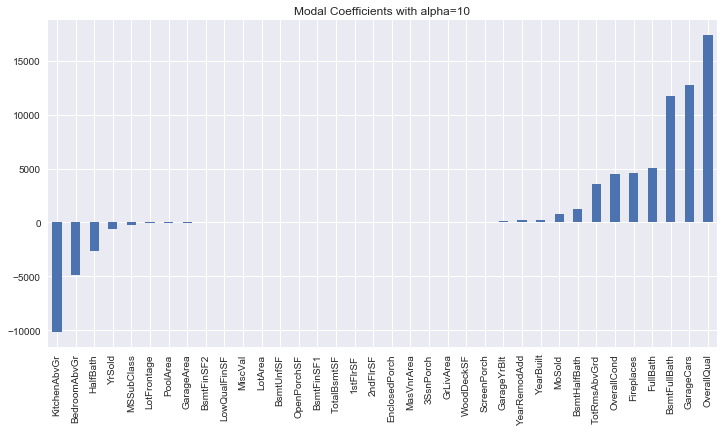

In [513]:

#predictors = x_train.columns

coef = pd.Series(rdg.coef_, X_train.columns).sort_values()
coef.plot(kind='bar', title='Modal Coefficients with alpha=10')

In [514]:
y_pred= rdg.predict(X_valid)
rsme = np.sqrt(metrics.mean_squared_error(y_pred, y_valid)) 
rsme

36883.384091343374

In [515]:
print (rdg.intercept_)

-31376.0537026


#  TESTING WITH ONLY ONE FEATURE/VARIABLE


In [516]:
# Definig/Spliting Data Set

X = df_train_num.loc[:,['OverallQual']]
X_train, X_valid, y_train, y_valid = train_test_split(X, df_train_num.SalePrice, test_size=0.25)

## LINEAR REGRESSION with only 1 variable (OverallQual)

In [517]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_valid)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

44160.682718893295

In [518]:
reg.score(X_valid, y_valid)

0.64699371509019199

In [519]:
reg.intercept_

-99241.650369823736

## L1 LASSO REGRESSION with only 1 variable (OverallQual)¶

In [397]:
ls = linear_model.Lasso(alpha=1, max_iter=500000)
ls.fit(X_train, y_train)
y_pred = ls.predict(X_valid)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

48848.824053322664

In [256]:
ls.score(X_valid, y_valid)

0.58895897898428506

In [257]:
ls.intercept_

-101868.30835903776

## L2 RIDGE REGRESSION with only 1 variable (OverallQual)¶¶

In [259]:
rdgCV = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100, 1000], cv=5)
rdgCV.fit(X_train, y_train)
print (rdgCV.alpha_)

10


In [260]:
rdg = Ridge(alpha=10)
rdg.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [261]:
rdg.score(X_train, y_train)

0.63376241282168644

In [262]:
coeff = pd.DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = pd.Series(rdg.coef_)
coeff

,0,Coefficient Estimate
0,OverallQual,46262.590671


In [263]:
y_pred= rdg.predict(X_valid)
rsme = np.sqrt(metrics.mean_squared_error(y_pred, y_valid)) 
rsme

45909.992830408883

In [264]:
print (rdg.intercept_)

-100551.883144


#  TESTING WITH ONLY TWO FEATURES/VARIABLES

In [265]:
# Definig/Spliting Data Set

X = df_train_num.loc[:,['OverallQual', 'GrLivArea']]
X_train, X_valid, y_train, y_valid = train_test_split(X, df_train_num.SalePrice, test_size=0.25)

## LINEAR REGRESSION with only 2 variables (OverallQual, GrLivArea)

In [266]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_valid)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

40670.621749995204

In [267]:
reg.score(X_valid, y_valid)

0.7376873897499876

In [268]:
ls.intercept_

-101868.30835903776

Text(0.5,1,'Residual plot')

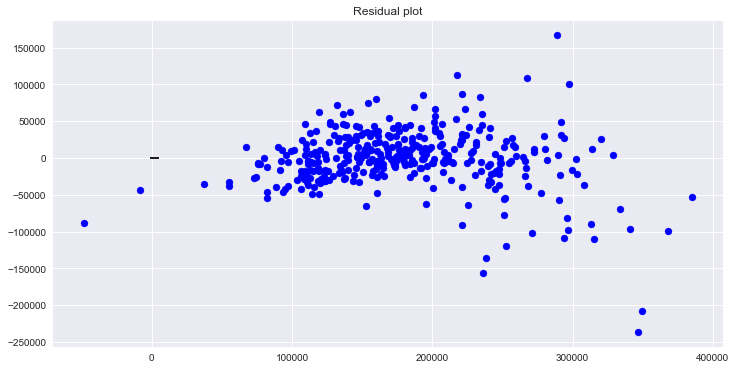

In [269]:
x_plot = plt.scatter(y_pred, (y_pred - y_valid), c='b')

plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')



## L1 LASSO REGRESSION with only 2 variables (OverallQual, GrLivArea)

In [271]:
ls = linear_model.Lasso(alpha=1, max_iter=500000)
ls.fit(X_train, y_train)
y_pred = ls.predict(X_valid)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

40670.551641105943

In [272]:
ls.score(X_valid, y_valid)

0.73768829410940473

In [273]:
ls.intercept_

-99235.760842933523

## L2 RIDGE REGRESSION with only 2 variables (OverallQual, GrLivArea)

In [274]:
rdgCV = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100, 1000], cv=5)
rdgCV.fit(X_train, y_train)
print (rdgCV.alpha_)

10


In [275]:
rdg = Ridge(alpha=0.1)
rdg.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [276]:
rdg.score(X_train, y_train)

0.70600227291590045

In [277]:
y_pred= rdg.predict(X_valid)
rsme = np.sqrt(metrics.mean_squared_error(y_pred, y_valid)) 
rsme

40670.880494632955

In [278]:
rdg.intercept_

-99224.700581802783

# TESTING WITH 7 VARIABLES

## LINEAR REGRESSION WITH 7 VARIABLES

In [527]:
X_test = df_test_num
X_train, X_valid, y_train, y_valid = train_test_split(df_train_num.loc[:,['OverallQual','GrLivArea', 'FullBath', 'YearBuilt', 'GarageCars','TotalBsmtSF', 'TotRmsAbvGrd']], 
                                                      df_train_num.SalePrice, test_size=0.25)

In [528]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_valid)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

41366.361293545742

In [529]:
reg.score(X_valid, y_valid)

0.7893631784685009

In [530]:
ls.intercept_

-99241.618657928891

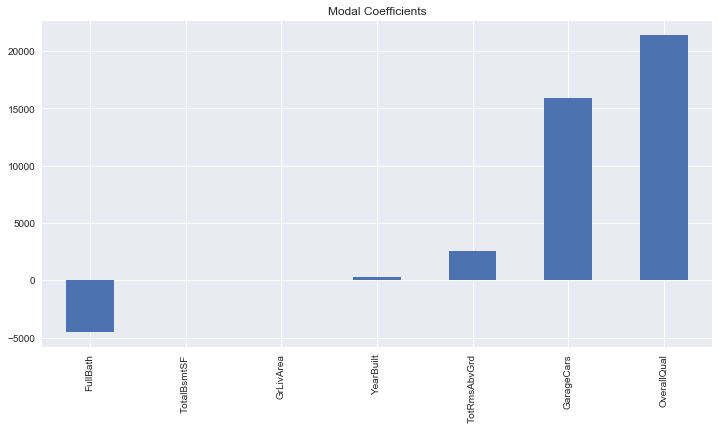

In [531]:
#predictors = x_train.columns

coef = pd.Series(reg.coef_, X_train.columns).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

## L1 LASSO REGRESSION WITH 7 VARIABLES

In [541]:
ls = linear_model.Lasso(alpha=10, max_iter=500000)
ls.fit(X_train, y_train)
y_pred = ls.predict(X_valid)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

41362.688257560527

In [542]:
ls.score(X_valid, y_valid)

0.78940058288371373

In [543]:
ls.intercept_

-709289.36790178553

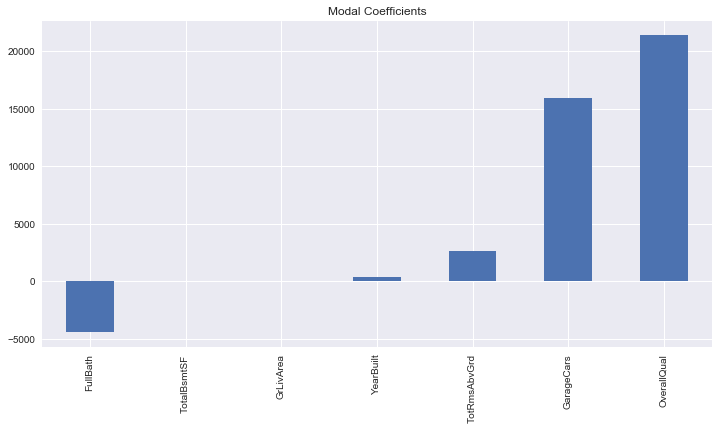

In [544]:
#predictors = x_train.columns

coef = pd.Series(ls.coef_, X_train.columns).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

## L2 RIDGE REGRESSION WITH 7 VARIABLES¶

In [562]:
rdgCV = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100, 1000], cv=5)
rdgCV.fit(X_train, y_train)
print (rdgCV.alpha_)

10


In [563]:
rdg = Ridge(alpha=10)
rdg.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [564]:
rdg.score(X_train, y_train)

0.75224705434215

In [565]:
y_pred= rdg.predict(X_valid)
rsme = np.sqrt(metrics.mean_squared_error(y_pred, y_valid)) 
rsme

41335.171750158166

In [566]:
rdg.intercept_

-719369.0130814109

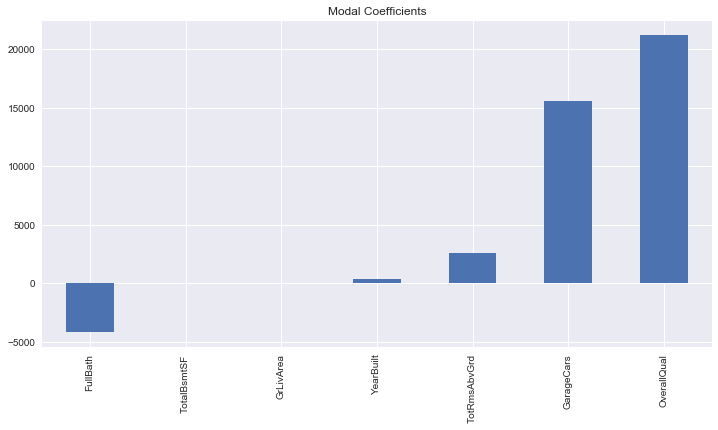

In [567]:
#predictors = x_train.columns

coef = pd.Series(rdg.coef_, X_train.columns).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')